In [1]:
#n-octane Peng-Robinson equation
def specificvolPR(v,p):
    #for n-octane
    Tc=568.8 #K
    pc=24.5 #atm
    T=600 #K
    R=0.08206 #1/gmol
    acentric=0.397
    mPR = 0.37363 + (1.54226 - 0.26992*acentric)*acentric
    alphaPR = (1 + mPR*(1-(T/Tc)**0.5))**2
    aPR = 0.45724*alphaPR*(R*Tc)**2/pc
    bPR = 0.07780*(R*Tc/pc)
    return p*v**3+(bPR*p-R*T)*v**2+(aPR-p*bPR**2-R*T*bPR)*v+(p*bPR**3+R*T*bPR**2-aPR*bPR)

In [3]:
print(specificvolPR(2,3))

-113.3039911086265


In [1]:
#Equations of state using python programming language
from scipy. optimize import fsolve
def f(x):
    return x**2-2*x-8
print(f(1.1))

-8.99


In [4]:
x=fsolve(f,0)
print('The root is %5.3f.'%x)

The root is -2.000.


In [5]:
#Specific volume of n-octane using Redlizh-kwong equation of stat
def specificvol(v):
    #for n-octane
    Tc=568.8 #K
    pc=24.5 #atm
    T=600 #K
    p=20 #atm
    R=0.08206 #l/gmol
    aRK = 0.42748*(R*Tc)**2/pc
    aRK = aRK*(Tc/T)**0.5
    bRK = 0.08664*(R*Tc/pc)
    return p*v**3-R*T*v**2+(aRK-p*bRK**2-R*T*bRK)*v-aRK*bRK

print(specificvol(2))

13.626115914387217


In [7]:
v =fsolve(specificvol,2)
print(v)

[1.75281907]


In [16]:
#pyhton code to compute the compressibility factor for a number of pressure values.
from scipy. optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

#n-octane Redlich kwong equation
def specificvolRK(v,p):
    Tc = 568.8 #K
    pc = 24.5 #atm
    T = 600 #K
    R = 0.08206 #l/gmol
    aRK = 0.42728*(R*Tc)**2/pc
    aRK = aRK*(Tc/T)**0.5
    bRK = 0.08664*(R*Tc/pc)
    return p*v**3-R*T*v**2+(aRK-p*bRK**2-R*T*bRK)*v-aRK*bRK

#n-octane Redlich-kwong-soave Equation
def specificvolRKS(v,p):
    Tc = 568.8 #K
    pc = 24.5 #atm
    T = 600 #K
    R = 0.08206 #l/gmol
    acentric = 0.397
    mRKS = 0.480+(1.574-0.176*acentric)*acentric
    alphaRKS = (1+mRKS*(1-(T/Tc)**0.5))**2
    aRKS = 0.42748*alphaRKS*(R*Tc)**2/pc
    bRKS = 0.08664*(R*Tc/pc)
    return p*v**3-R*T*v**2+(aRKS-p*bRKS**2-R*T*bRKS)*v-aRKS*bRKS

In [9]:
T = 600
R = 0.08206
pressure = np.arange(1,27,5)
print(pressure)
print(pressure[0])
print(pressure[5])
zcompRK = np.zeros(6,dtype=float)
zcompRKS = np.zeros(6,dtype=float)
zcompPR = np.zeros(6,dtype=float)
print(zcompRK)

[ 1  6 11 16 21 26]
1
26
[0. 0. 0. 0. 0. 0.]


[0.98801128 0.92537841 0.85720206 0.78126952 0.69345052 0.58456418]
[0. 0. 0. 0. 0. 0.]
[0.98850164 0.9286727  0.86413637 0.79330263 0.71354567 0.62032486]


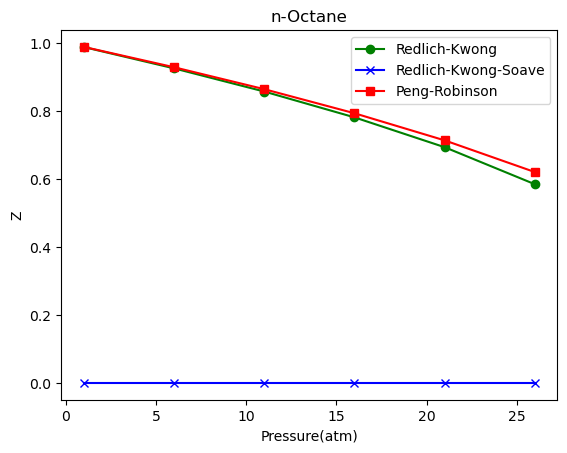

In [17]:
for i in range (0,6,1):
    p = pressure[i]
    guess = R*T/p
    v = fsolve(specificvolRK, guess, p)
    z = p*v/(R*T)
    zcompRK[i] = z
    v = fsolve(specificvolRKS, v, p)
    z = p*v/(R*T)
    zcompPR[i] = z
    
print(zcompRK)
print(zcompRKS)
print(zcompPR)
plt.plot(pressure,zcompRK,'o-g',label='Redlich-Kwong')
plt.plot(pressure,zcompRKS,'x-b',label='Redlich-Kwong-Soave')
plt.plot(pressure,zcompPR,'s-r',label='Peng-Robinson')
plt.legend(loc='best')
plt.xlabel('Pressure(atm)')
plt.ylabel('Z')
plt.title('n-Octane')
plt.show()